# Challenge 2

In this challenge we will continue working with the `Pokemon` dataset. We will attempt solving a slightly more complex problem in which we will practice the iterative data analysis process you leaned in [this video](https://www.youtube.com/watch?v=xOomNicqbkk).

The problem statement is as follows:

**You are at a Pokemon black market planning to buy a Pokemon for battle. All Pokemon are sold at the same price and you can only afford to buy one. You cannot choose which specific Pokemon to buy. However, you can specify the type of the Pokemon - one type that exists in either `Type 1` or `Type 2`. Which type should you choose in order to maximize your chance of receiving a good Pokemon?**

To remind you about the 3 steps of iterative data analysis, they are:

1. Setting Expectations
1. Collecting Information
1. Reacting to Data / Revising Expectations

Following the iterative process, we'll guide you in completing the challenge.


## Problem Solving Iteration 1

In this iteration we'll analyze the problem and identify the breakthrough. The original question statement is kind of vague because we don't know what a *good pokemon* really means as represented in the data. We'll start by understanding the dataset and see if we can find some insights.

In [4]:
# Import libraries
import numpy as np
import pandas as pd

In [5]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


From the data it seems whether a pokemon is good depends on its abilities as represented in the fields of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total`. We are not sure about `Generation` and `Legendary` because they are not necessarily the decisive factors of the pokemon abilities.

But `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total` are a lot of fields! If we look at them all at once it's very complicated. This isn't Mission Impossible but it's ideal that we tackle this kind of problem after we learn Machine Learning (which you will do in Module 3). For now, is there a way to consolidate the fields we need to look into?

Fortunately there seems to be a way. It appears the `Total` field is computed based on the other 6 fields. But we need to prove our theory. If we can approve there is a formula to compute `Total` based on the other 6 abilities, we only need to look into `Total`.

We have the following expectation now:

#### The `Total` field is computed based on `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed`.

We need to collect the following information:

* **What is the formula to compute `Total`?**
* **Does the formula work for all pokemon?**

In the cell below, make a hypothesis on how `Total` is computed and test your hypothesis.

In [16]:
# let's check if the column total is the sum of the others
check = [pokemon['Total'] == pokemon['HP']+pokemon['Attack']+pokemon['Defense']+pokemon['Sp. Atk']+pokemon['Sp. Def']+pokemon['Speed']]
check

[0      True
 1      True
 2      True
 3      True
 4      True
        ... 
 795    True
 796    True
 797    True
 798    True
 799    True
 Length: 800, dtype: bool]

In [17]:
# are there false rows in the list ?
np.where(check == False)

# there are no false values --> the formula works for all pokemons

(array([], dtype=int64),)

## Problem Solving Iteration 2

Now that we have consolidated the abilities fields, we can update the problem statement. The new problem statement is:

### Which pokemon type is most likely to have the highest `Total` value?

In the updated problem statement, we assume there is a certain relationship between the `Total` and the pokemon type. But we have two *type* fields (`Type 1` and `Type 2`) that have string values. In data analysis, string fields have to be transformed to numerical format in order to be analyzed. 

In addition, keep in mind that `Type 1` always has a value but `Type 2` is sometimes empty (having the `NaN` value). Also, the pokemon type we choose may be either in `Type 1` or `Type 2`.

Now our expectation is:

#### `Type 1` and `Type 2` string variables need to be converted to numerical variables in order to identify the relationship between `Total` and the pokemon type.

The information we need to collect is:

#### How to convert two string variables to numerical?

Let's address the first question first. You can use a method called **One Hot Encoding** which is frequently used in machine learning to encode categorical string variables to numerical. The idea is to gather all the possible string values in a categorical field and create a numerical field for each unique string value. Each of those numerical fields uses `1` and `0` to indicate whether the data record has the corresponding categorical value. A detailed explanation of One Hot Encoding can be found in [this article](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f). You will formally learn it in Module 3.

For instance, if a pokemon has `Type 1` as `Poison` and `Type 2` as `Fire`, then its `Poison` and `Fire` fields are `1` whereas all other fields are `0`. If a pokemon has `Type 1` as `Water` and `Type 2` as `NaN`, then its `Water` field is `1` whereas all other fields are `0`.

#### In the next cell, use One Hot Encoding to encode `Type 1` and `Type 2`. Use the pokemon type values as the names of the numerical fields you create.

The new numerical variables you create should look like below:

![One Hot Encoding](../images/one-hot-encoding.png)

In [18]:
# first let's take out NaN values from Type 2
pokemon['Type 2'] = pokemon['Type 2'].fillna('Unknown')
pokemon['Type 2'].isna().sum()

0

In [29]:
# then let's encode the categorical values 
X_cat = pokemon[['Type 1', 'Type 2']]

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoder.fit(X_cat)

print(encoder.get_feature_names_out())

['Type 1_Bug' 'Type 1_Dark' 'Type 1_Dragon' 'Type 1_Electric'
 'Type 1_Fairy' 'Type 1_Fighting' 'Type 1_Fire' 'Type 1_Flying'
 'Type 1_Ghost' 'Type 1_Grass' 'Type 1_Ground' 'Type 1_Ice'
 'Type 1_Normal' 'Type 1_Poison' 'Type 1_Psychic' 'Type 1_Rock'
 'Type 1_Steel' 'Type 1_Water' 'Type 2_Bug' 'Type 2_Dark' 'Type 2_Dragon'
 'Type 2_Electric' 'Type 2_Fairy' 'Type 2_Fighting' 'Type 2_Fire'
 'Type 2_Flying' 'Type 2_Ghost' 'Type 2_Grass' 'Type 2_Ground'
 'Type 2_Ice' 'Type 2_Normal' 'Type 2_Poison' 'Type 2_Psychic'
 'Type 2_Rock' 'Type 2_Steel' 'Type 2_Unknown' 'Type 2_Water']


In [30]:
encoded_train = encoder.transform(X_cat).toarray()

X_onehot_encoded = pd.DataFrame(encoded_train,columns=encoder.get_feature_names_out())
X_onehot_encoded.head(20)

,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Unknown,Type 2_Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Problem Solving Iteration 3

Now we have encoded the pokemon types, we will identify the relationship between `Total` and the encoded fields. Our expectation is:

#### There are relationships between `Total` and the encoded pokemon type variables and we need to identify the correlations.

The information we need to collect is:

#### How to identify the relationship between `Total` and the encoded pokemon type fields?

There are multiple ways to answer this question. The easiest way is to use correlation. In the cell below, calculate the correlation of `Total` to each of the encoded fields. Rank the correlations and identify the #1 pokemon type that is most likely to have the highest `Total`.

In [34]:
pokemon_corr = pd.concat([pokemon['Total'], X_onehot_encoded], axis = 1)
pokemon_corr.head()

,Total,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Unknown,Type 2_Water
0,318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,309,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


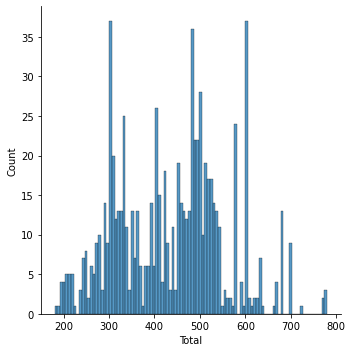

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.displot(x='Total', data=pokemon_corr, bins = 100)          

In [45]:
pd.set_option('display.max_columns', 100)

correlation = pokemon_corr.corr()
correlation
# Type 1 dragon = 0.196

,Total,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Type 2_Bug,Type 2_Dark,Type 2_Dragon,Type 2_Electric,Type 2_Fairy,Type 2_Fighting,Type 2_Fire,Type 2_Flying,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Unknown,Type 2_Water
Total,1.000000,-0.143957,0.017818,0.196532,0.016715,-0.026948,-0.029086,0.050527,0.029504,0.007594,-0.036057,0.004082,-0.002412,-0.104150,-0.057123,0.094364,0.037524,0.082000,-0.015640,-0.021375,0.065844,0.115240,0.014669,-0.024606,0.138726,0.073234,0.054048,-0.004885,-0.039224,0.016486,0.100870,-0.013956,-0.067837,0.076054,-0.000512,0.070307,-0.185945,-0.018800
Type 1_Bug,-0.143957,1.000000,-0.061686,-0.062713,-0.074119,-0.045270,-0.057419,-0.081006,-0.021779,-0.062713,-0.095138,-0.062713,-0.054031,-0.114792,-0.058511,-0.085096,-0.074119,-0.057419,-0.123960,-0.018849,-0.049196,-0.046612,0.076510,-0.052859,-0.006089,0.035349,0.076849,-0.007046,0.098365,-0.022177,-0.041003,-0.021779,0.200143,-0.063727,0.060868,0.138928,-0.145178,-0.007046
Type 1_Dark,0.017818,-0.061686,1.000000,-0.040984,-0.048438,-0.029584,-0.037524,-0.052938,-0.014233,-0.040984,-0.062173,-0.040984,-0.035310,-0.075017,-0.038237,-0.055611,-0.048438,-0.037524,-0.081009,-0.012318,-0.032150,0.100556,-0.017454,-0.034544,0.036251,0.135074,0.024629,0.071991,-0.036061,-0.042946,0.071991,-0.014233,-0.042300,0.023490,-0.026796,0.045446,-0.064256,-0.026796
Type 1_Dragon,0.196532,-0.062713,-0.040984,1.000000,-0.049245,-0.030077,-0.038149,-0.053820,-0.014470,-0.041667,-0.063209,-0.041667,-0.035898,-0.076267,-0.038874,-0.056538,-0.049245,-0.038149,-0.082359,-0.012524,-0.032686,-0.030969,0.056190,0.003054,-0.037412,0.027289,0.041429,-0.027243,-0.036662,0.112272,0.118700,-0.014470,-0.043005,0.085964,-0.027243,-0.034325,-0.056679,-0.027243
Type 1_Electric,0.016715,-0.074119,-0.048438,-0.049245,1.000000,-0.035547,-0.045088,-0.063609,-0.017102,-0.049245,-0.074706,-0.049245,-0.042427,-0.090138,-0.045945,-0.066820,-0.058201,-0.045088,-0.097338,-0.014801,-0.038631,0.000370,-0.020972,-0.008695,-0.044216,0.015337,-0.005627,0.009617,-0.011817,-0.051602,0.009617,0.138368,-0.050827,-0.050041,-0.032197,0.060014,0.063312,0.009617
Type 1_Fairy,-0.026948,-0.045270,-0.029584,-0.030077,-0.035547,1.000000,-0.027538,-0.038850,-0.010445,-0.030077,-0.045628,-0.030077,-0.025913,-0.055054,-0.028062,-0.040812,-0.035547,-0.027538,-0.059451,-0.009040,-0.023595,-0.022355,-0.012809,-0.025351,-0.027006,-0.018183,-0.001626,-0.019665,-0.026464,-0.031517,-0.019665,-0.010445,-0.031043,-0.030563,-0.019665,-0.024778,0.117907,-0.019665
Type 1_Fighting,-0.029086,-0.057419,-0.037524,-0.038149,-0.045088,-0.027538,1.000000,-0.049277,-0.013248,-0.038149,-0.057873,-0.038149,-0.032868,-0.069829,-0.035593,-0.051765,-0.045088,-0.034929,-0.075406,-0.011466,0.014409,-0.028355,-0.016246,-0.032155,-0.034254,-0.023063,-0.048217,-0.024943,-0.033567,-0.039976,-0.024943,-0.013248,-0.039375,0.065654,-0.024943,0.053226,0.096586,-0.024943
Type 1_Fire,0.050527,-0.081006,-0.052938,-0.053820,-0.063609,-0.038850,-0.049277,1.000000,-0.018691,-0.053820,-0.081647,-0.053820,-0.046369,-0.098513,-0.050214,-0.073029,-0.063609,-0.049277,-0.106381,-0.016176,-0.042220,-0.005812,-0.022920,-0.045363,0.151836,-0.032537,-0.004738,-0.035189,-0.047355,0.017973,-0.035189,0.125084,-0.055549,-0.003697,0.003480,-0.013332,0.029528,0.003480
Type 1_Flying,0.029504,-0.021779,-0.014233,-0.014470,-0.017102,-0.010445,-0.013248,-0.018691,1.000000,-0.014470,-0.021951,-0.014470,-0.012467,-0.026486,-0.013500,-0.019634,-0.017102,-0.013248,-0.028601,-0.004349,-0.011351,0.228243,-0.006162,-0.012196,-0.012992,-0.008748,-0.026332,-0.009461,-0.012732,-0.015163,-0.009461,-0.005025,-0.014935,-0.014704,-0.009461,-0.011921,0.002483,-0.009461
Type 1_Ghost,0.007594,-0.062713,-0.040984

In [53]:
# Rank the correlations and identify the #1 pokemon type that is most likely to have the highest Total.
correlation
rank_correlation = correlation.sort_values('Total', ascending = False).head(4)
rank_correlation

,Total,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Type 2_Bug,Type 2_Dark,Type 2_Dragon,Type 2_Electric,Type 2_Fairy,Type 2_Fighting,Type 2_Fire,Type 2_Flying,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Unknown,Type 2_Water
Total,1.000000,-0.143957,0.017818,0.196532,0.016715,-0.026948,-0.029086,0.050527,0.029504,0.007594,-0.036057,0.004082,-0.002412,-0.104150,-0.057123,0.094364,0.037524,0.082000,-0.015640,-0.021375,0.065844,0.115240,0.014669,-0.024606,0.138726,0.073234,0.054048,-0.004885,-0.039224,0.016486,0.100870,-0.013956,-0.067837,0.076054,-0.000512,0.070307,-0.185945,-0.018800
Type 1_Dragon,0.196532,-0.062713,-0.040984,1.000000,-0.049245,-0.030077,-0.038149,-0.053820,-0.014470,-0.041667,-0.063209,-0.041667,-0.035898,-0.076267,-0.038874,-0.056538,-0.049245,-0.038149,-0.082359,-0.012524,-0.032686,-0.030969,0.056190,0.003054,-0.037412,0.027289,0.041429,-0.027243,-0.036662,0.112272,0.118700,-0.014470,-0.043005,0.085964,-0.027243,-0.034325,-0.056679,-0.027243
Type 2_Fighting,0.138726,-0.006089,0.036251,-0.037412,-0.044216,-0.027006,-0.034254,0.151836,-0.012992,-0.037412,0.018087,-0.037412,-0.032232,-0.025478,0.041809,0.031445,-0.013296,0.004782,-0.013002,-0.011245,-0.029348,-0.027807,-0.015932,-0.031533,1.000000,-0.022617,-0.068081,-0.024461,-0.032918,-0.039203,-0.024461,-0.012992,-0.038614,-0.038017,-0.024461,-0.030820,-0.176974,-0.024461
Type 2_Dragon,0.115240,-0.046612,0.100556,-0.030969,0.000370,-0.022355,-0.028355,-0.005812,0.228243,0.055056,-0.017152,0.055056,-0.026681,-0.056686,0.016969,-0.042022,0.037341,0.018320,-0.012631,-0.009308,-0.024294,1.000000,-0.013189,-0.026103,-0.027807,-0.018722,-0.056356,-0.020248,-0.027249,-0.032452,-0.020248,-0.010755,-0.031964,-0.031470,-0.020248,-0.025513,-0.146496,-0.020248


In [ ]:
# the Top 3 of pokemon type that are most likely to have the highest total = 
# 1. Type 1 - Dragon
# 2. Type 2 - Fighting
# 3. Type 2 - Dragon
# I would take the first one (even if the correlation is very low)

# Bonus Question

Say now you can choose both `Type 1` and `Type 2` of the pokemon. In order to receive the best pokemon, which types will you choose?

In [60]:
# It's the same question but it urges us to work on combo type (cf challenge 1)

new_col = []
for i in range(len(pokemon['Type 2'])):
    if pokemon['Type 2'][i] == 'Unknown' :
        new_col.append(str(pokemon['Type 1'][i]))
    else : 
        new_col.append(str(pokemon['Type 1'][i]) + "-" + str(pokemon['Type 2'][i]))

In [61]:
pokemon['Combo Type'] = new_col
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combo Type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass-Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass-Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass-Poison
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass-Poison
4,4,Charmander,Fire,Unknown,309,39,52,43,60,50,65,1,False,Fire


In [62]:
# check for isna :
pokemon['Combo Type'].isna().sum()

0

In [64]:
# let's encode 
pokemon2 = pokemon.copy()
X_cat2 = pokemon[['Combo Type']]

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoder.fit(X_cat2)

print(encoder.get_feature_names_out())

['Combo Type_Bug' 'Combo Type_Bug-Electric' 'Combo Type_Bug-Fighting'
 'Combo Type_Bug-Fire' 'Combo Type_Bug-Flying' 'Combo Type_Bug-Ghost'
 'Combo Type_Bug-Grass' 'Combo Type_Bug-Ground' 'Combo Type_Bug-Poison'
 'Combo Type_Bug-Rock' 'Combo Type_Bug-Steel' 'Combo Type_Bug-Water'
 'Combo Type_Dark' 'Combo Type_Dark-Dragon' 'Combo Type_Dark-Fighting'
 'Combo Type_Dark-Fire' 'Combo Type_Dark-Flying' 'Combo Type_Dark-Ghost'
 'Combo Type_Dark-Ice' 'Combo Type_Dark-Psychic' 'Combo Type_Dark-Steel'
 'Combo Type_Dragon' 'Combo Type_Dragon-Electric'
 'Combo Type_Dragon-Fairy' 'Combo Type_Dragon-Fire'
 'Combo Type_Dragon-Flying' 'Combo Type_Dragon-Ground'
 'Combo Type_Dragon-Ice' 'Combo Type_Dragon-Psychic' 'Combo Type_Electric'
 'Combo Type_Electric-Dragon' 'Combo Type_Electric-Fairy'
 'Combo Type_Electric-Fire' 'Combo Type_Electric-Flying'
 'Combo Type_Electric-Ghost' 'Combo Type_Electric-Grass'
 'Combo Type_Electric-Ice' 'Combo Type_Electric-Normal'
 'Combo Type_Electric-Steel' 'Combo Type_E

In [65]:
encoded_train2 = encoder.transform(X_cat2).toarray()

X_onehot_encoded2 = pd.DataFrame(encoded_train2,columns=encoder.get_feature_names_out())
X_onehot_encoded2.head(20)

,Combo Type_Bug,Combo Type_Bug-Electric,Combo Type_Bug-Fighting,Combo Type_Bug-Fire,Combo Type_Bug-Flying,Combo Type_Bug-Ghost,Combo Type_Bug-Grass,Combo Type_Bug-Ground,Combo Type_Bug-Poison,Combo Type_Bug-Rock,Combo Type_Bug-Steel,Combo Type_Bug-Water,Combo Type_Dark,Combo Type_Dark-Dragon,Combo Type_Dark-Fighting,Combo Type_Dark-Fire,Combo Type_Dark-Flying,Combo Type_Dark-Ghost,Combo Type_Dark-Ice,Combo Type_Dark-Psychic,Combo Type_Dark-Steel,Combo Type_Dragon,Combo Type_Dragon-Electric,Combo Type_Dragon-Fairy,Combo Type_Dragon-Fire,Combo Type_Dragon-Flying,Combo Type_Dragon-Ground,Combo Type_Dragon-Ice,Combo Type_Dragon-Psychic,Combo Type_Electric,Combo Type_Electric-Dragon,Combo Type_Electric-Fairy,Combo Type_Electric-Fire,Combo Type_Electric-Flying,Combo Type_Electric-Ghost,Combo Type_Electric-Grass,Combo Type_Electric-Ice,Combo Type_Electric-Normal,Combo Type_Electric-Steel,Combo Type_Electric-Water,Combo Type_Fairy,Combo Type_Fairy-Flying,Combo Type_Fighting,Combo Type_Fighting-Dark,Combo Type_Fighting-Flying,Combo Type_Fighting-Psychic,Combo Type_Fighting-Steel,Combo Type_Fire,Combo Type_Fire-Dragon,Combo Type_Fire-Fighting,...,Combo Type_Poison-Dragon,Combo Type_Poison-Fighting,Combo Type_Poison-Flying,Combo Type_Poison-Ground,Combo Type_Poison-Water,Combo Type_Psychic,Combo Type_Psychic-Dark,Combo Type_Psychic-Fairy,Combo Type_Psychic-Fighting,Combo Type_Psychic-Fire,Combo Type_Psychic-Flying,Combo Type_Psychic-Ghost,Combo Type_Psychic-Grass,Combo Type_Rock,Combo Type_Rock-Bug,Combo Type_Rock-Dark,Combo Type_Rock-Dragon,Combo Type_Rock-Fairy,Combo Type_Rock-Fighting,Combo Type_Rock-Flying,Combo Type_Rock-Grass,Combo Type_Rock-Ground,Combo Type_Rock-Ice,Combo Type_Rock-Psychic,Combo Type_Rock-Steel,Combo Type_Rock-Water,Combo Type_Steel,Combo Type_Steel-Dragon,Combo Type_Steel-Fairy,Combo Type_Steel-Fighting,Combo Type_Steel-Flying,Combo Type_Steel-Ghost,Combo Type_Steel-Ground,Combo Type_Steel-Psychic,Combo Type_Steel-Rock,Combo Type_Water,Combo Type_Water-Dark,Combo Type_Water-Dragon,Combo Type_Water-Electric,Combo Type_Water-Fairy,Combo Type_Water-Fighting,Combo Type_Water-Flying,Combo Type_Water-Ghost,Combo Type_Water-Grass,Combo Type_Water-Ground,Combo Type_Water-Ice,Combo Type_Water-Poison,Combo Type_Water-Psychic,Combo Type_Water-Rock,Combo Type_Water-Steel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [66]:
pokemon_corr2 = pd.concat([pokemon['Total'], X_onehot_encoded2], axis = 1)
pokemon_corr2.head()

,Total,Combo Type_Bug,Combo Type_Bug-Electric,Combo Type_Bug-Fighting,Combo Type_Bug-Fire,Combo Type_Bug-Flying,Combo Type_Bug-Ghost,Combo Type_Bug-Grass,Combo Type_Bug-Ground,Combo Type_Bug-Poison,Combo Type_Bug-Rock,Combo Type_Bug-Steel,Combo Type_Bug-Water,Combo Type_Dark,Combo Type_Dark-Dragon,Combo Type_Dark-Fighting,Combo Type_Dark-Fire,Combo Type_Dark-Flying,Combo Type_Dark-Ghost,Combo Type_Dark-Ice,Combo Type_Dark-Psychic,Combo Type_Dark-Steel,Combo Type_Dragon,Combo Type_Dragon-Electric,Combo Type_Dragon-Fairy,Combo Type_Dragon-Fire,Combo Type_Dragon-Flying,Combo Type_Dragon-Ground,Combo Type_Dragon-Ice,Combo Type_Dragon-Psychic,Combo Type_Electric,Combo Type_Electric-Dragon,Combo Type_Electric-Fairy,Combo Type_Electric-Fire,Combo Type_Electric-Flying,Combo Type_Electric-Ghost,Combo Type_Electric-Grass,Combo Type_Electric-Ice,Combo Type_Electric-Normal,Combo Type_Electric-Steel,Combo Type_Electric-Water,Combo Type_Fairy,Combo Type_Fairy-Flying,Combo Type_Fighting,Combo Type_Fighting-Dark,Combo Type_Fighting-Flying,Combo Type_Fighting-Psychic,Combo Type_Fighting-Steel,Combo Type_Fire,Combo Type_Fire-Dragon,...,Combo Type_Poison-Dragon,Combo Type_Poison-Fighting,Combo Type_Poison-Flying,Combo Type_Poison-Ground,Combo Type_Poison-Water,Combo Type_Psychic,Combo Type_Psychic-Dark,Combo Type_Psychic-Fairy,Combo Type_Psychic-Fighting,Combo Type_Psychic-Fire,Combo Type_Psychic-Flying,Combo Type_Psychic-Ghost,Combo Type_Psychic-Grass,Combo Type_Rock,Combo Type_Rock-Bug,Combo Type_Rock-Dark,Combo Type_Rock-Dragon,Combo Type_Rock-Fairy,Combo Type_Rock-Fighting,Combo Type_Rock-Flying,Combo Type_Rock-Grass,Combo Type_Rock-Ground,Combo Type_Rock-Ice,Combo Type_Rock-Psychic,Combo Type_Rock-Steel,Combo Type_Rock-Water,Combo Type_Steel,Combo Type_Steel-Dragon,Combo Type_Steel-Fairy,Combo Type_Steel-Fighting,Combo Type_Steel-Flying,Combo Type_Steel-Ghost,Combo Type_Steel-Ground,Combo Type_Steel-Psychic,Combo Type_Steel-Rock,Combo Type_Water,Combo Type_Water-Dark,Combo Type_Water-Dragon,Combo Type_Water-Electric,Combo Type_Water-Fairy,Combo Type_Water-Fighting,Combo Type_Water-Flying,Combo Type_Water-Ghost,Combo Type_Water-Grass,Combo Type_Water-Ground,Combo Type_Water-Ice,Combo Type_Water-Poison,Combo Type_Water-Psychic,Combo Type_Water-Rock,Combo Type_Water-Steel
0,318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [67]:
correlation2 = pokemon_corr2.corr()
correlation2

,Total,Combo Type_Bug,Combo Type_Bug-Electric,Combo Type_Bug-Fighting,Combo Type_Bug-Fire,Combo Type_Bug-Flying,Combo Type_Bug-Ghost,Combo Type_Bug-Grass,Combo Type_Bug-Ground,Combo Type_Bug-Poison,Combo Type_Bug-Rock,Combo Type_Bug-Steel,Combo Type_Bug-Water,Combo Type_Dark,Combo Type_Dark-Dragon,Combo Type_Dark-Fighting,Combo Type_Dark-Fire,Combo Type_Dark-Flying,Combo Type_Dark-Ghost,Combo Type_Dark-Ice,Combo Type_Dark-Psychic,Combo Type_Dark-Steel,Combo Type_Dragon,Combo Type_Dragon-Electric,Combo Type_Dragon-Fairy,Combo Type_Dragon-Fire,Combo Type_Dragon-Flying,Combo Type_Dragon-Ground,Combo Type_Dragon-Ice,Combo Type_Dragon-Psychic,Combo Type_Electric,Combo Type_Electric-Dragon,Combo Type_Electric-Fairy,Combo Type_Electric-Fire,Combo Type_Electric-Flying,Combo Type_Electric-Ghost,Combo Type_Electric-Grass,Combo Type_Electric-Ice,Combo Type_Electric-Normal,Combo Type_Electric-Steel,Combo Type_Electric-Water,Combo Type_Fairy,Combo Type_Fairy-Flying,Combo Type_Fighting,Combo Type_Fighting-Dark,Combo Type_Fighting-Flying,Combo Type_Fighting-Psychic,Combo Type_Fighting-Steel,Combo Type_Fire,Combo Type_Fire-Dragon,...,Combo Type_Poison-Dragon,Combo Type_Poison-Fighting,Combo Type_Poison-Flying,Combo Type_Poison-Ground,Combo Type_Poison-Water,Combo Type_Psychic,Combo Type_Psychic-Dark,Combo Type_Psychic-Fairy,Combo Type_Psychic-Fighting,Combo Type_Psychic-Fire,Combo Type_Psychic-Flying,Combo Type_Psychic-Ghost,Combo Type_Psychic-Grass,Combo Type_Rock,Combo Type_Rock-Bug,Combo Type_Rock-Dark,Combo Type_Rock-Dragon,Combo Type_Rock-Fairy,Combo Type_Rock-Fighting,Combo Type_Rock-Flying,Combo Type_Rock-Grass,Combo Type_Rock-Ground,Combo Type_Rock-Ice,Combo Type_Rock-Psychic,Combo Type_Rock-Steel,Combo Type_Rock-Water,Combo Type_Steel,Combo Type_Steel-Dragon,Combo Type_Steel-Fairy,Combo Type_Steel-Fighting,Combo Type_Steel-Flying,Combo Type_Steel-Ghost,Combo Type_Steel-Ground,Combo Type_Steel-Psychic,Combo Type_Steel-Rock,Combo Type_Water,Combo Type_Water-Dark,Combo Type_Water-Dragon,Combo Type_Water-Electric,Combo Type_Water-Fairy,Combo Type_Water-Fighting,Combo Type_Water-Flying,Combo Type_Water-Ghost,Combo Type_Water-Grass,Combo Type_Water-Ground,Combo Type_Water-Ice,Combo Type_Water-Poison,Combo Type_Water-Psychic,Combo Type_Water-Rock,Combo Type_Water-Steel
Total,1.000000,-0.178699,-0.016537,0.047979,0.008309,-0.017369,-0.058753,-0.037054,-0.037625,-0.089742,-0.000052,0.058471,-0.049015,0.001030,0.002506,-0.007142,0.021270,0.038960,-0.002131,0.014572,-0.020922,-0.008394,-0.021410,0.072266,0.045708,0.072266,0.149777,0.057482,0.128737,0.127066,-0.033589,0.051610,-0.001211,0.025052,0.067801,0.001445,0.025052,0.025052,-0.020922,0.003359,0.025052,-0.034786,0.016660,-0.053630,0.017675,0.019150,-0.017964,0.058418,-0.036359,0.058692,...,0.017380,-0.016746,-0.011993,0.029188,-0.033965,0.054856,0.072266,-0.027628,0.104173,0.048659,0.010560,0.048659,0.048659,-0.022829,-0.004219,0.089736,0.002671,0.084386,0.042757,0.052859,-0.004219,-0.039954,0.002671,0.002045,0.011035,-0.012642,0.038960,0.072266,0.004212,0.042757,0.008822,0.010730,0.052154,0.041902,-0.002611,-0.050266,0.042585,0.073033,-0.016746,-0.041801,0.062210,-0.024374,-0.011526,-0.045257,-0.001128,0.039182,-0.004317,0.030361,-0.003756,0.028003
Combo Type_Bug,-0.178699,1.000000,-0.007377,-0.007377,-0.007377,-0.019665,-0.005213,-0.012809,-0.007377,-0.018183,-0.009040,-0.013844,-0.005213,-0.016578,-0.009040,-0.007377,-0.009040,-0.011685,-0.007377,-0.007377,-0.007377,-0.007377,-0.017398,-0.005213,-0.005213,-0.005213,-0.012809,-0.011685,-0.009040,-0.010445,-0.027538,-0.005213,-0.005213,-0.005213,-0.011685,-0.005213,-0.005213,-0.005213,-0.007377,-0.009040,-0.005213,-0.020368,-0.007377,-0.023595,-0.005213,-0.005213,-0.009040,-0.007377,-0.028062,-0.005213,...,-0.005213,-0.007377,-0.009040,-0.007377,-0.005213,-0.032905,-0.005213,-0.012809,-0.009040,-0.005213,-0.012809,-0.005213,-0.005213,-0.015717,-0.007377,-0.007377,-0.007377,-0.009040,-0.005213,-0.010445,-0.007377,-0.012809,-0.007377,-0.007

In [68]:
rank_combo = correlation2.sort_values('Total', ascending = False).head(4)
rank_combo

,Total,Combo Type_Bug,Combo Type_Bug-Electric,Combo Type_Bug-Fighting,Combo Type_Bug-Fire,Combo Type_Bug-Flying,Combo Type_Bug-Ghost,Combo Type_Bug-Grass,Combo Type_Bug-Ground,Combo Type_Bug-Poison,Combo Type_Bug-Rock,Combo Type_Bug-Steel,Combo Type_Bug-Water,Combo Type_Dark,Combo Type_Dark-Dragon,Combo Type_Dark-Fighting,Combo Type_Dark-Fire,Combo Type_Dark-Flying,Combo Type_Dark-Ghost,Combo Type_Dark-Ice,Combo Type_Dark-Psychic,Combo Type_Dark-Steel,Combo Type_Dragon,Combo Type_Dragon-Electric,Combo Type_Dragon-Fairy,Combo Type_Dragon-Fire,Combo Type_Dragon-Flying,Combo Type_Dragon-Ground,Combo Type_Dragon-Ice,Combo Type_Dragon-Psychic,Combo Type_Electric,Combo Type_Electric-Dragon,Combo Type_Electric-Fairy,Combo Type_Electric-Fire,Combo Type_Electric-Flying,Combo Type_Electric-Ghost,Combo Type_Electric-Grass,Combo Type_Electric-Ice,Combo Type_Electric-Normal,Combo Type_Electric-Steel,Combo Type_Electric-Water,Combo Type_Fairy,Combo Type_Fairy-Flying,Combo Type_Fighting,Combo Type_Fighting-Dark,Combo Type_Fighting-Flying,Combo Type_Fighting-Psychic,Combo Type_Fighting-Steel,Combo Type_Fire,Combo Type_Fire-Dragon,...,Combo Type_Poison-Dragon,Combo Type_Poison-Fighting,Combo Type_Poison-Flying,Combo Type_Poison-Ground,Combo Type_Poison-Water,Combo Type_Psychic,Combo Type_Psychic-Dark,Combo Type_Psychic-Fairy,Combo Type_Psychic-Fighting,Combo Type_Psychic-Fire,Combo Type_Psychic-Flying,Combo Type_Psychic-Ghost,Combo Type_Psychic-Grass,Combo Type_Rock,Combo Type_Rock-Bug,Combo Type_Rock-Dark,Combo Type_Rock-Dragon,Combo Type_Rock-Fairy,Combo Type_Rock-Fighting,Combo Type_Rock-Flying,Combo Type_Rock-Grass,Combo Type_Rock-Ground,Combo Type_Rock-Ice,Combo Type_Rock-Psychic,Combo Type_Rock-Steel,Combo Type_Rock-Water,Combo Type_Steel,Combo Type_Steel-Dragon,Combo Type_Steel-Fairy,Combo Type_Steel-Fighting,Combo Type_Steel-Flying,Combo Type_Steel-Ghost,Combo Type_Steel-Ground,Combo Type_Steel-Psychic,Combo Type_Steel-Rock,Combo Type_Water,Combo Type_Water-Dark,Combo Type_Water-Dragon,Combo Type_Water-Electric,Combo Type_Water-Fairy,Combo Type_Water-Fighting,Combo Type_Water-Flying,Combo Type_Water-Ghost,Combo Type_Water-Grass,Combo Type_Water-Ground,Combo Type_Water-Ice,Combo Type_Water-Poison,Combo Type_Water-Psychic,Combo Type_Water-Rock,Combo Type_Water-Steel
Total,1.000000,-0.178699,-0.016537,0.047979,0.008309,-0.017369,-0.058753,-0.037054,-0.037625,-0.089742,-0.000052,0.058471,-0.049015,0.001030,0.002506,-0.007142,0.021270,0.038960,-0.002131,0.014572,-0.020922,-0.008394,-0.021410,0.072266,0.045708,0.072266,0.149777,0.057482,0.128737,0.127066,-0.033589,0.051610,-0.001211,0.025052,0.067801,0.001445,0.025052,0.025052,-0.020922,0.003359,0.025052,-0.034786,0.016660,-0.053630,0.017675,0.019150,-0.017964,0.058418,-0.036359,0.058692,...,0.017380,-0.016746,-0.011993,0.029188,-0.033965,0.054856,0.072266,-0.027628,0.104173,0.048659,0.010560,0.048659,0.048659,-0.022829,-0.004219,0.089736,0.002671,0.084386,0.042757,0.052859,-0.004219,-0.039954,0.002671,0.002045,0.011035,-0.012642,0.038960,0.072266,0.004212,0.042757,0.008822,0.010730,0.052154,0.041902,-0.002611,-0.050266,0.042585,0.073033,-0.016746,-0.041801,0.062210,-0.024374,-0.011526,-0.045257,-0.001128,0.039182,-0.004317,0.030361,-0.003756,0.028003
Combo Type_Dragon-Flying,0.149777,-0.012809,-0.004352,-0.004352,-0.004352,-0.011602,-0.003075,-0.007557,-0.004352,-0.010727,-0.005333,-0.008167,-0.003075,-0.009780,-0.005333,-0.004352,-0.005333,-0.006894,-0.004352,-0.004352,-0.004352,-0.004352,-0.010264,-0.003075,-0.003075,-0.003075,1.000000,-0.006894,-0.005333,-0.006162,-0.016246,-0.003075,-0.003075,-0.003075,-0.006894,-0.003075,-0.003075,-0.003075,-0.004352,-0.005333,-0.003075,-0.012016,-0.004352,-0.013920,-0.003075,-0.003075,-0.005333,-0.004352,-0.016555,-0.003075,...,-0.003075,-0.004352,-0.005333,-0.004352,-0.003075,-0.019412,-0.003075,-0.007557,-0.005333,-0.003075,-0.007557,-0.003075,-0.003075,-0.009273,-0.004352,-0.004352,-0.004352,-0.005333,-0.003075,-0.006162,-0.004352,-0.007557,-0.0043

In [ ]:
# I would choose a Dragon-Flying type of pokemon !